In [1]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import turtle
from sympy.ntheory import factorint
import time
import secrets
from sympy import isprime, primerange, randprime, mod_inverse

import warnings

from PIL import Image
import colorsys

import math
import os

# Basic Algebra Exercise
## Functions, Polynomials, Complex Numbers. Applications of Abstract Algebra

### Problem 1. Polynomial Interpolation
We know that if we have a set of $n$ data points with coordinates $(x_1; y_1), (x_2; y_2), \dots, (x_n; y_n)$, we can try to figure out what function may have generated these points.

Please note that **our assumptions about the data** will lead us to choosing one function over another. This means that our results are as good as our data and assumptions. Therefore, it's extremely important that we write down our assumptions (which sometimes can be difficult as we sometimes don't realize we're making them). It will be better for our readers if they know what those assumptions and models are.

In this case, we'll state two assumptions:
1. The points in our dataset are generated by a polynomial function
2. The points are very precise, there is absolutely no error in them. This means that the function should pass **through every point**

This method is called *polynomial interpolation* (*"polynomial"* captures assumption 1 and *"interpolation"* captures assumption 2).

It can be proved (look at [Wikipedia](https://en.wikipedia.org/wiki/Polynomial_interpolation) for example) that if we have $n$ data points, there is only one polynomial of degree $n-1$ which passes through them. In "math speak": "the vector spaces of $n$ points and polynomials of degree $n-1$ are isomorphic (there exists a bijection mapping one to the other)".

There are a lot of ways to do interpolation. We can also write the function ourselves if we want but this requires quite a lot more knowledge than we already covered in this course. So we'll use a function which does this for us. `numpy.polyfit()` is one such function. It accepts three main parameters (there are others as well, but they are optional): a list of $x$ coordinates, a list of $y$ coordinates, and a polynomial degree.

Let's say we have these points:
```python
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
```

First, we need to "extract" the coordinates:
```python
x = points[:, 0]
y = points[:, 1]
```

Then, we need to calculate the interpolating polynomial. For the degree, we'll initially set $n-1$:
```python
poly  = np.polynomial.polynomial.Polynomial.fit(...)
# TODO: Find a way to make the line shorter; call the correct arguments
```

After that, we need to plot the function. To do this, we'll create a range of $x$ values and evaluate the polynomial at each value:
```python
plot_x = np.linspace(np.min(x), np.max(x), 1000) # If you want, pass the number of points as a parameter
plot_y = poly(plot_x)
```

Finally, we need to plot the result. We'll plot both the fitting polynomial curve (using `plt.plot()`) and the points (using `plt.scatter`). It's also nice to have different colors to make the line stand out from the points.
```python
plt.plot(plot_x, plot_y, c = "green")
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
```
Don't forget to label the axes!

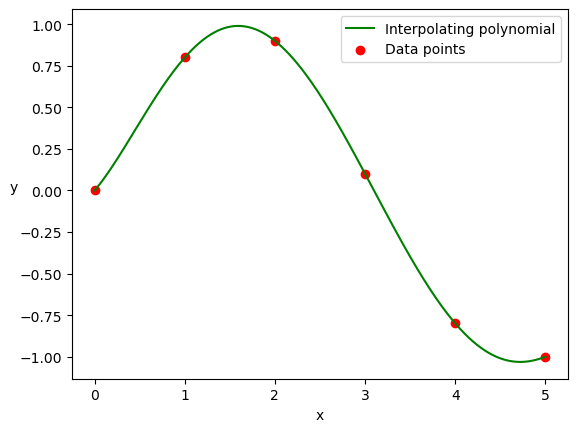

In [3]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
x = points[:, 0]
y = points[:, 1]
degree = len(points) - 1
coefficients = np.polyfit(x, y, degree)
poly = np.poly1d(coefficients)

plot_x = np.linspace(np.min(x), np.max(x), 1000)
plot_y = poly(plot_x)

plt.plot(plot_x, plot_y, c="green", label='Interpolating polynomial')
plt.scatter(x, y, c="red", label='Data points')
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.legend()
plt.show()


Your task now is to **wrap the code in a function**. It should accept a list of points, the polynomial degree, min and max value of $x$ used for plotting. **Be extremely careful to ensure that the function uses its parameters!** Of course, you can extract other utility functions if you wish (e.g., separating plotting from the rest is a good idea).

We'll use this function to try some other cases.

In [4]:
def interpolate_polynomial(points, degree, min_x, max_x):
    """
    Interpolates a polynomial of the specified degree through the given points and plots it
    points - a list of points (x, y) to plot
    degree - the polynomial degree
    min_x, max_x - range of x values used to plot the interpolating polynomial
    """
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', np.RankWarning)
        coefficients = np.polyfit(x, y, degree)

    poly = np.poly1d(coefficients)

    plot_x = np.linspace(min_x, max_x, 1000)
    plot_y = poly(plot_x)

    plt.plot(plot_x, plot_y, c="green", label='Interpolating polynomial')
    plt.scatter(x, y, c="red", label='Data points')
    plt.xlabel("x")
    plt.ylabel("y", rotation=0)
    plt.legend()
    plt.show()

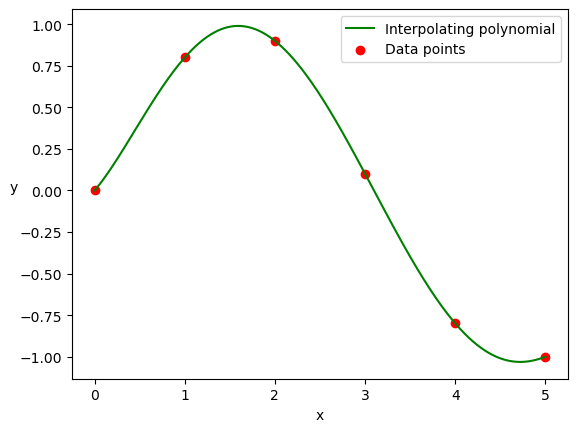

In [5]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

We see this is a very nice fit. This is expected, of course. Let's try to expand our view a little. Let's try to plot other values of $x$, further than the original ones. This is **extrapolation**.

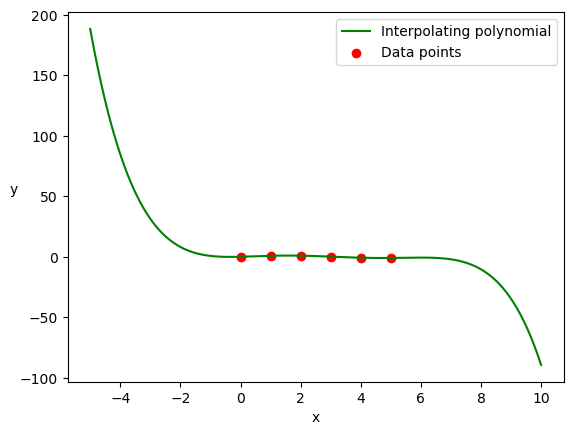

In [6]:
interpolate_polynomial(points, len(points) - 1, -5, 10)

Hmmm... it seems our polynomial goes a little wild outside the original range. This is to show how **extrapolation can be quite dangerous**.

Let's try a lower polynomial degree now. We used 4, how about 3, 2 and 1?
**Note:** We can add titles to every plot so that we know what exactly we're doing. Te title may be passed as an additional parameter to our function.

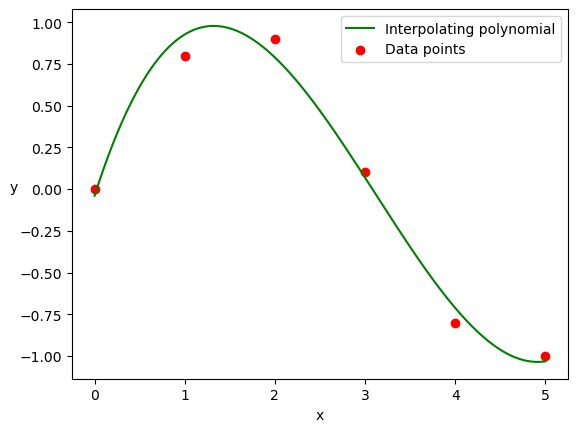

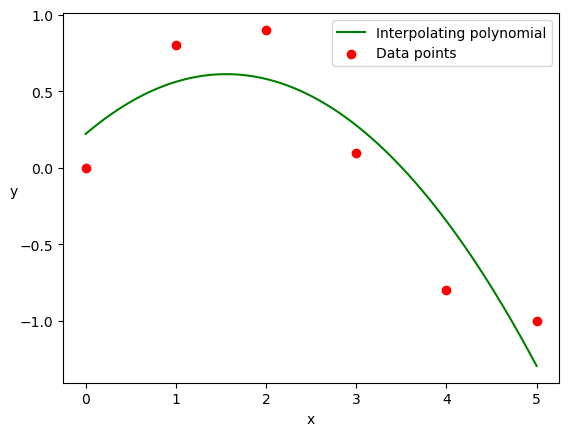

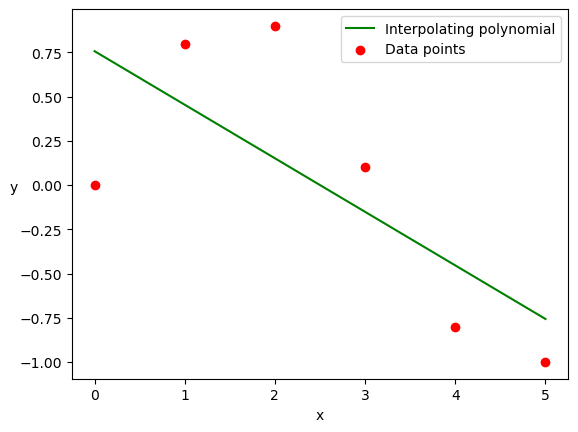

In [7]:
interpolate_polynomial(points, 3, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 2, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 1, np.min(points[:, 0]), np.max(points[:, 0]))

We see the fitting curves (or line in the last case) struggle more and more and they don't pass through every point. This breaks our assumptions but it can be very useful.

Okay, one more thing. How about increasing the degree? Let's try 5, 7 and 10. Python might complain a little, just ignore it, everything is fine... sort of :).

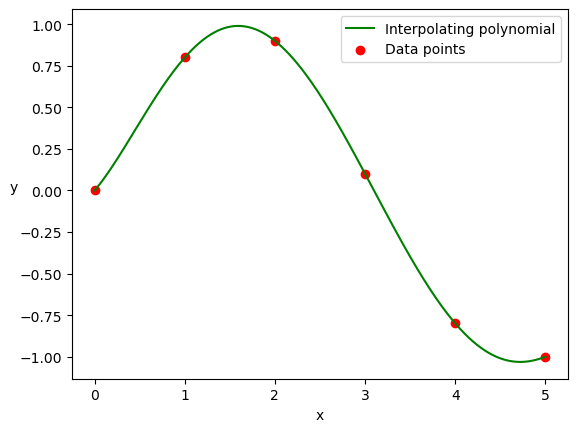

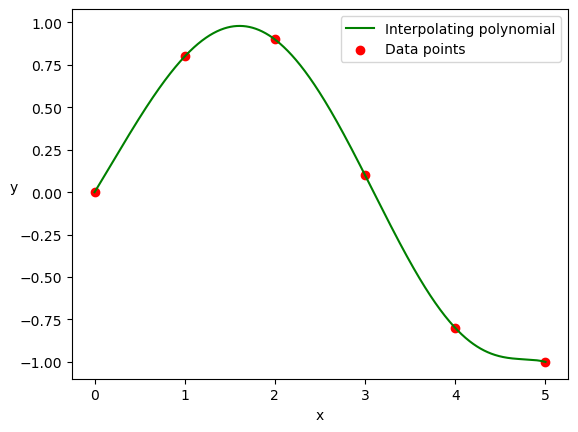

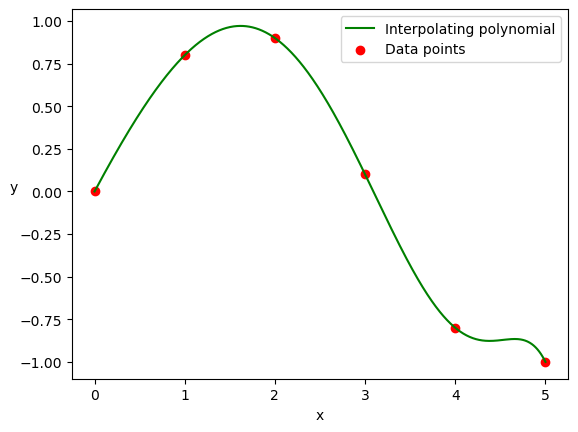

In [8]:
interpolate_polynomial(points, 5, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 7, np.min(points[:, 0]), np.max(points[:, 0]))
interpolate_polynomial(points, 10, np.min(points[:, 0]), np.max(points[:, 0]))

Those graphs look pretty much the same. But that's the point exactly. I'm being quite sneaky here. Let's try to expand our view once again and see what our results really look like.

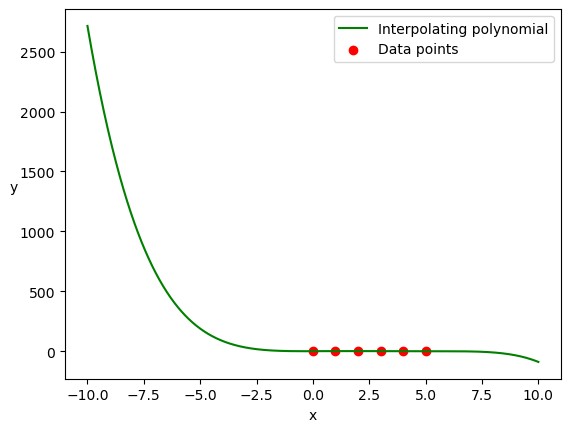

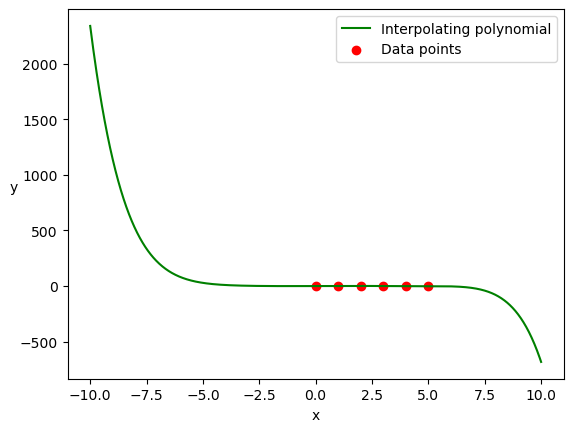

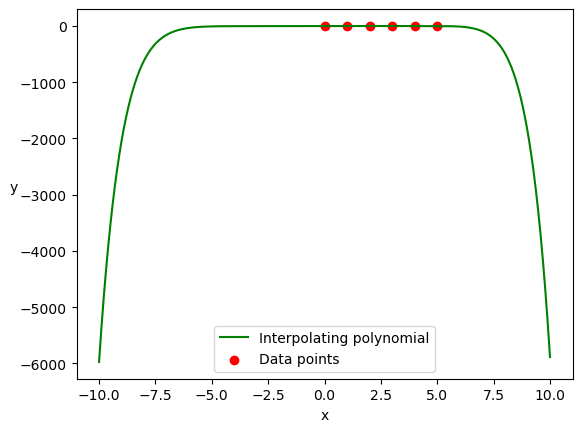

In [9]:
interpolate_polynomial(points, 5, -10, 10)
interpolate_polynomial(points, 7, -10, 10)
interpolate_polynomial(points, 10, -10, 10)

Now we see there are very wild differences. Even though the first two plots look quite similar, look at the $y$ values - they're quite different.

So, these are the dangers of interpolation. Use a too high degree, and you get "the polynomial wiggle". These are all meant to represent **the same** data points but they look insanely different. Here's one more comparison.

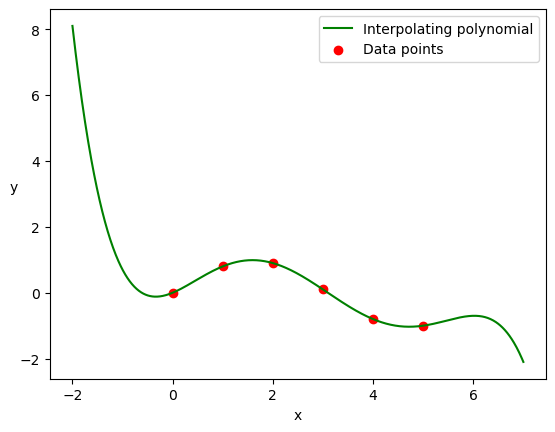

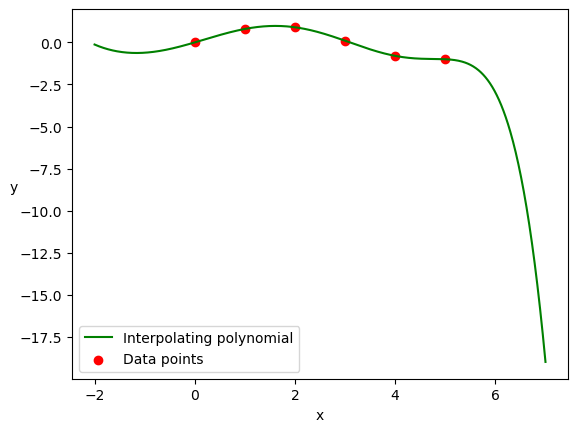

In [10]:
interpolate_polynomial(points, len(points) - 1, -2, 7)
interpolate_polynomial(points, len(points) + 1, -2, 7)

Now we can see what big difference even a small change in degree can make. This is why we have to choose our interpolating functions very carefully. Generally, a lower degree means a simpler function, which is to be preferred. See [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor).

And also, **we need to be very careful about our assumptions**.

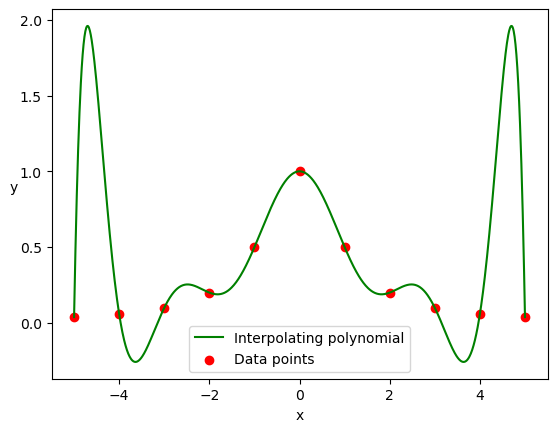

In [11]:
points = np.array([(-5, 0.03846), (-4, 0.05882), (-3, 0.1), (-2, 0.2), (-1, 0.5), (0, 1), (1, 0.5), (2, 0.2), (3, 0.1), (4, 0.05882), (5, 0.03846)])
interpolate_polynomial(points, len(points) - 1, np.min(points[:, 0]), np.max(points[:, 0]))

This plot definitely looks strange... This is because the generating function is not a polynomial. It's actually:
$$ y = \frac{1}{1 + x^2} $$

Plot the polynomial interpolation and the real generating function **on the same plot**. You may need to modify the original plotting function or just copy its contents.

In [12]:
def interpolate_and_plot_real_function(points, degree, min_x, max_x):
    """
    Interpolates a polynomial of the specified degree through the given points and plots it,
    along with the real generating function y = 1 / (1 + x^2).
    
    Parameters:
    points - a list of points (x, y) to plot
    degree - the polynomial degree
    min_x - minimum x value for plotting range
    max_x - maximum x value for plotting range
    """

    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]

    with warnings.catch_warnings():
        warnings.simplefilter('ignore', np.RankWarning)
        coefficients = np.polyfit(x, y, degree)

    poly = np.poly1d(coefficients)
    
    plot_x = np.linspace(min_x, max_x, 1000)
    plot_y = poly(plot_x)
    
    real_y = 1 / (1 + plot_x**2)
    
    # Plot the polynomial interpolation
    plt.plot(plot_x, plot_y, c="green", label='Interpolating polynomial')
    # Plot the real generating function
    plt.plot(plot_x, real_y, c="blue", linestyle='dashed', label='Real function y = 1 / (1 + x^2)')
    # Plot the data points
    plt.scatter(x, y, c="red", label='Data points')
    
    plt.xlabel("x", rotation=0)
    plt.ylabel("y", rotation=0)
    plt.legend()
    
    plt.show()


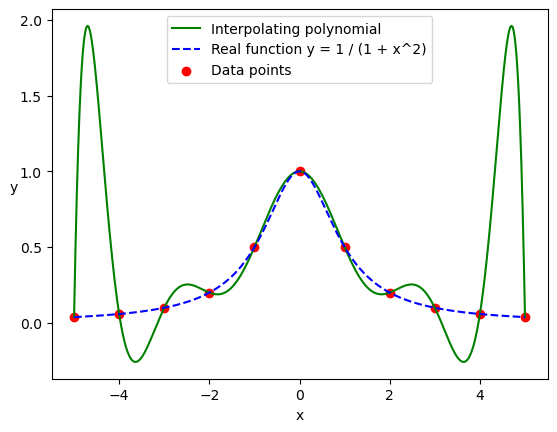

In [13]:
# Example usage
points = np.array([(-5, 0.03846), (-4, 0.05882), (-3, 0.1), (-2, 0.2), (-1, 0.5), 
                   (0, 1), (1, 0.5), (2, 0.2), (3, 0.1), (4, 0.05882), (5, 0.03846)])
degree = len(points) - 1
min_x = np.min(points[:, 0])
max_x = np.max(points[:, 0])

interpolate_and_plot_real_function(points, degree, min_x, max_x)

### Problem 2. Complex Numbers as Vectors
We saw that a complex number $z = a + bi$ is equivalent to (and therefore can be represented as) the ordered tuple $(a; b)$, which can be plotted in a 2D space. So, complex numbers and 2D points are equivalent. What is more, we can draw a vector from the origin of the coordinate plane to our point. This is called a point's **radius-vector**.

Let's try plotting complex numbers as radius vectors. Don't forget to label the real and imaginary axes. Also, move the axes to the origin. Hint: These are called "spines"; you'll need to move 2 of them to the origin and remove the other 2 completely. Hint 2: You already did this in the previous lab.

We can use `plt.quiver()` to plot the vector. It can behave a bit strangely, so we'll need to set the scale of the vectors to be the same as the scale on the graph axes:
```python
plt.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
```

Other than that, the main parameters are: $x_{begin}$, $y_{begin}$, $x_{length}$, $y_{length}$ in that order.

Now, set the aspect ratio of the axes to be equal. Also, add grid lines. Set the axis numbers (called ticks) to be something like `range(-3, 4)` for now.
```python
plt.xticks(range(-4, 4))
plt.yticks(range(-4, 4))

```

If you wish to, you can be a bit more clever with the tick marks. Find the minimal and maximal $x$ and $y$ values and set the ticks according to them. It's a good practice not to jam the plot too much, so leave a little bit of space. That is, if the actual x-range is $[-2; 2]$, set the plotting to be $[-2.5; 2.5]$ for example. Otherwise, the vector heads (arrows) will be "jammed" into a corner or side of the plot.

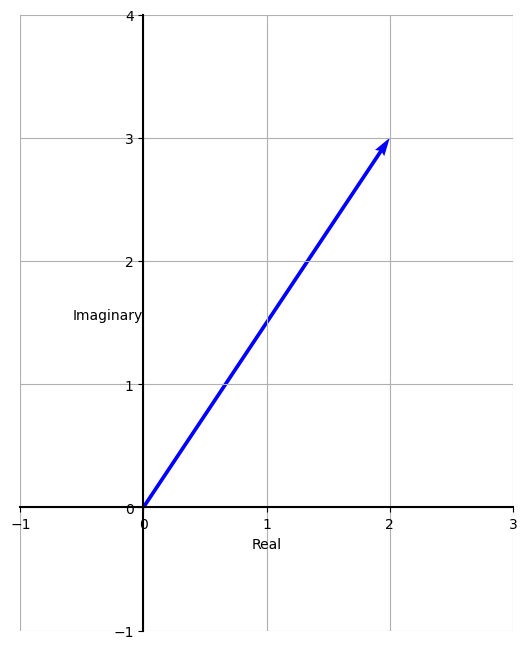

In [14]:
def plot_complex_number(z):
    """
    Plots the complex number z as a radius vector in the 2D space.
    
    Parameters:
    z - the complex number to plot
    """

    real_part = z.real
    imag_part = z.imag
    
    plt.figure(figsize=(8, 8))
    
    # Plot the complex number as a vector
    plt.quiver(0, 0, real_part, imag_part, angles='xy', scale_units='xy', scale=1, color='blue')
    
    padding = 1
    min_xaxis, max_xaxis = min(-padding, real_part - padding), max(padding, real_part + padding)
    min_yaxis, max_yaxis = min(-padding, imag_part - padding), max(padding, imag_part + padding)
    plt.xlim(min_xaxis, max_xaxis)
    plt.ylim(min_yaxis, max_yaxis)
    
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.grid(True)
    
    # Set ticks with a step of 1
    plt.xticks(np.arange(np.floor(min(-padding, real_part - padding)), np.ceil(max(padding, real_part + padding)) + 1, 1))
    plt.yticks(np.arange(np.floor(min(-padding, imag_part - padding)), np.ceil(max(padding, imag_part + padding)) + 1, 1))
    
    # Move the spines to the origin
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_position('zero')
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1.5)
    
    # Remove the top and right spines
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    # Set the position of the ticks on the left and bottom spines
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    # Label the axes
    plt.xlabel('Real')
    plt.ylabel('Imaginary', rotation=0)
    
    plt.show()

# Example usage
plot_complex_number(2 + 3j)


How about many numbers? We'll need to get a little bit more creative. First, we need to create a 2D array, each element of which will be a 4-element array: `[0, 0, z.real, z.imag]`. Next, `plt.quiver()` can accept a range of values. Look at [this StackOverflow post](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib) for details and adapt your code.

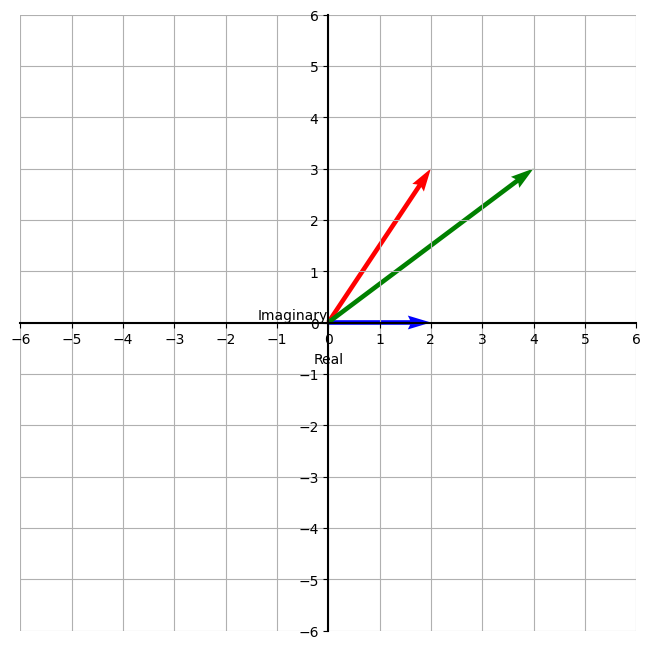

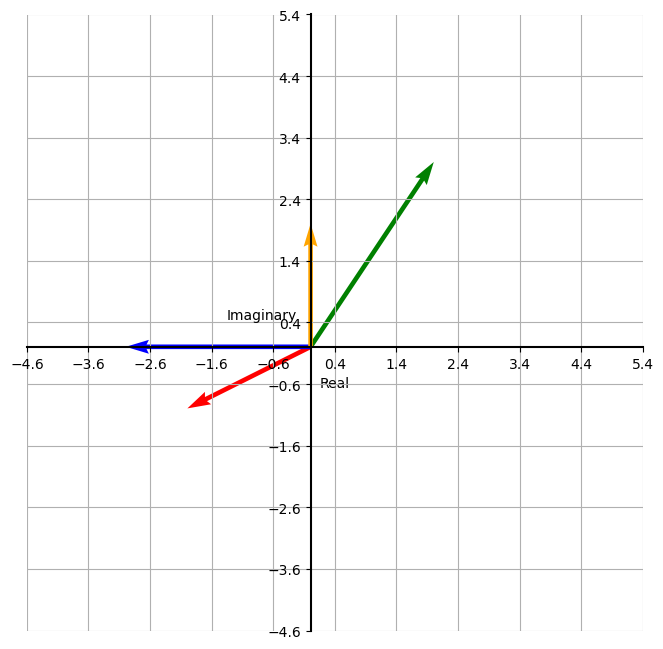

In [15]:
def plot_complex_numbers(numbers, colors):
    """
    Plots the given complex numbers as radius vectors in the 2D space
    """
    # Extract real and imaginary parts
    reals = [z.real for z in numbers]
    imaginaries = [z.imag for z in numbers]
    
    # Calculate maximum magnitude
    max_magnitude = max(abs(z) for z in numbers)
    
    plt.figure(figsize=(8, 8))
    
    # Plot the complex number as a vector
    for z, color in zip(numbers, colors):
        plt.quiver(0, 0, z.real, z.imag, angles='xy', scale_units='xy', scale=1, color=color)
    
    # Set plot limits and ticks based on maximum magnitude
    padding = max_magnitude + 1
    plt.xlim(-padding, padding)
    plt.ylim(-padding, padding)
    
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.grid(True)
    
    # Set ticks with a step of 1
    plt.xticks(np.arange(-padding, padding + 1, 1))
    plt.yticks(np.arange(-padding, padding + 1, 1))
    
    # Move the spines to the origin
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_position('zero')
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1.5)
    
    # Remove the top and right spines
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    # Set the position of the ticks on the left and bottom spines
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    # Label the axes
    plt.xlabel('Real')
    plt.ylabel('Imaginary', rotation=0)
    
    plt.show()

# Example usage
z1 = 2 + 3j
z2 = 2 + 0j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])


plot_complex_numbers([2 + 3j, -2 - 1j, -3, 2j], ["green", "red", "blue", "orange"])

Now let's add two numbers and plot the result.

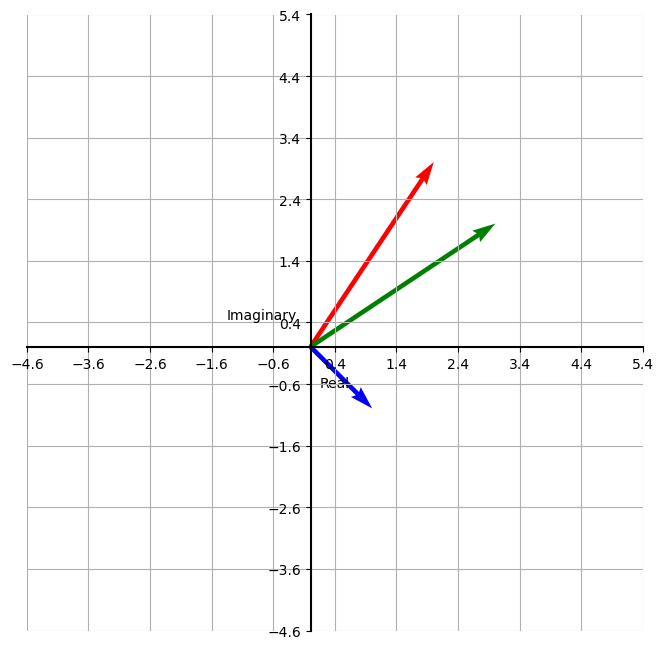

In [16]:
z1 = 2 + 3j
z2 = 1 - 1j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

We can see that adding the complex numbers is equivalent to adding vectors (remember the "parallelogram rule"). As special cases, let's try adding pure real and pure imaginary numbers:

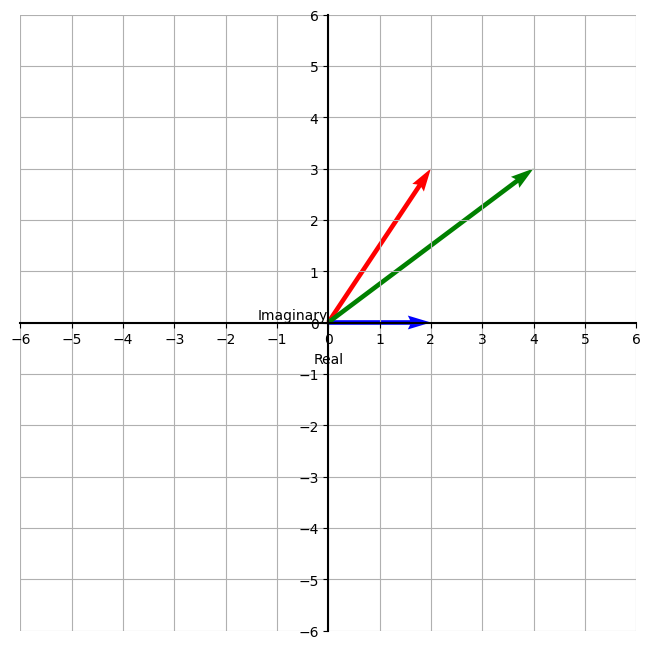

In [17]:
z1 = 2 + 3j
z2 = 2 + 0j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

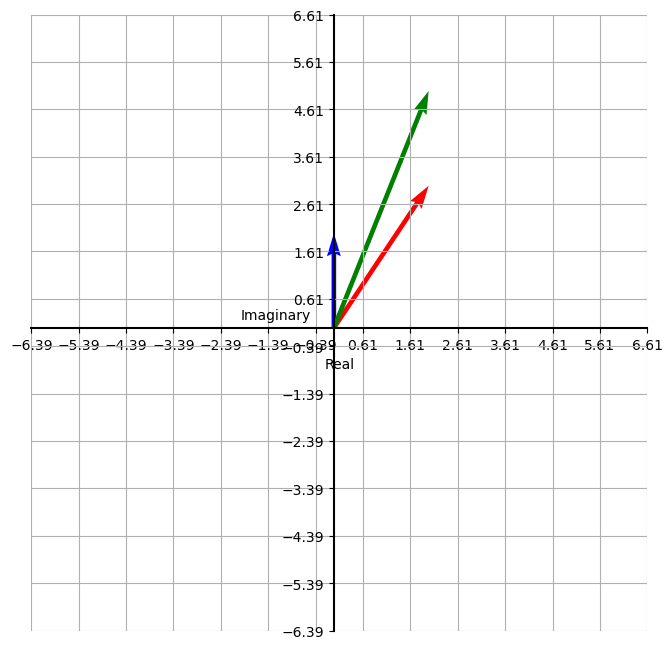

In [18]:
z1 = 2 + 3j
z2 = 0 + 2j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

How about multiplication? First we know that multiplying by 1 gives us the same vector and mulpiplying by -1 gives us the reversed version of the same vector. How about multiplication by $\pm i$?

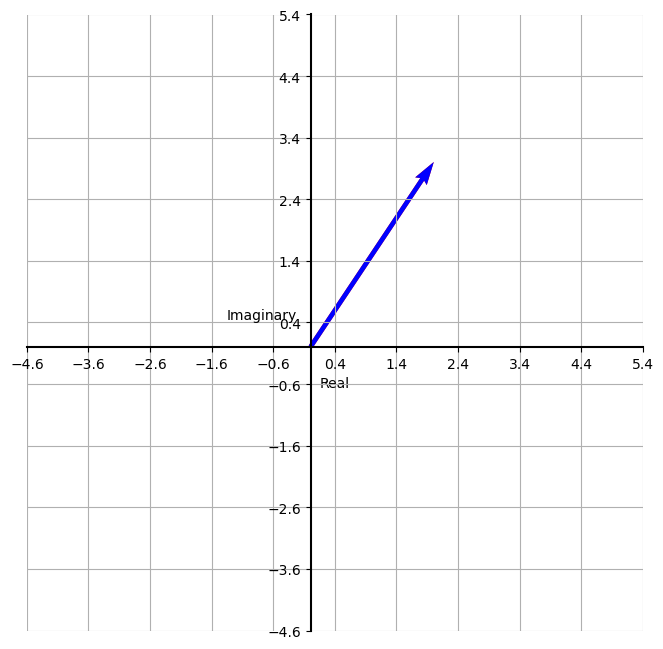

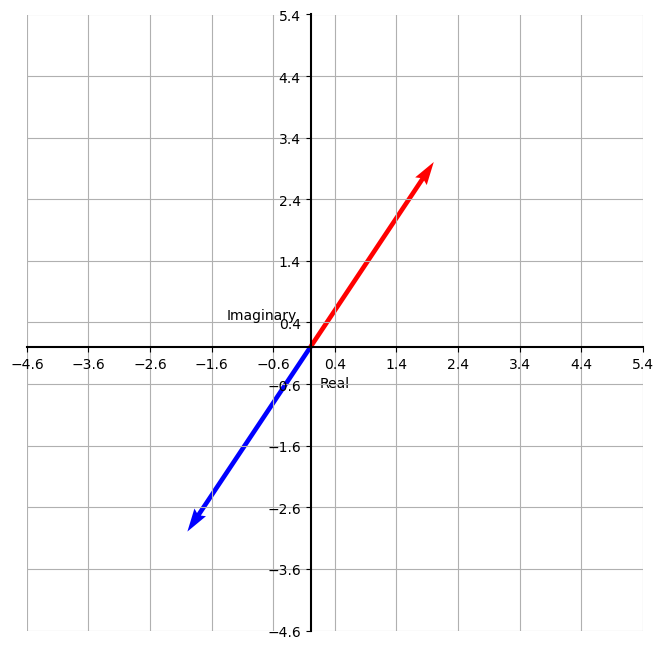

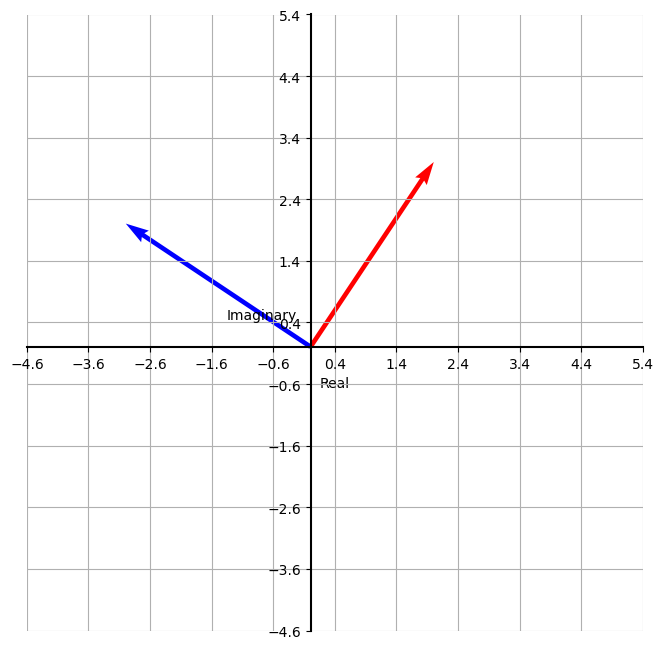

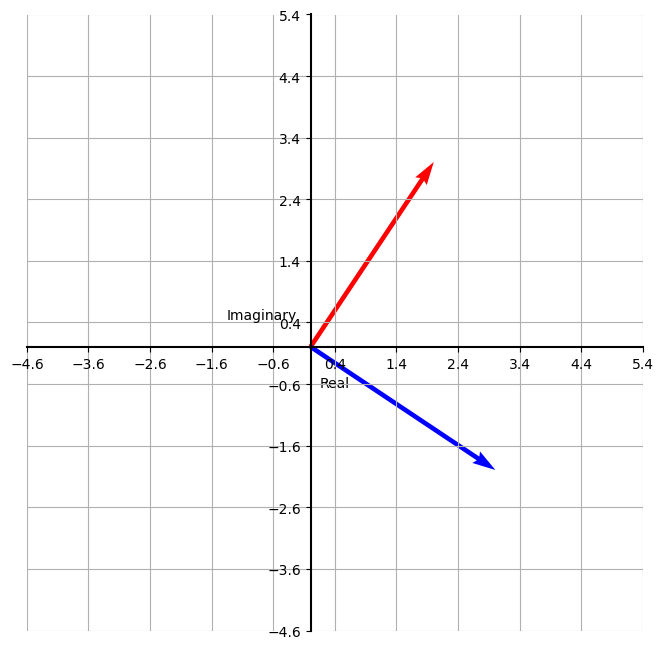

In [19]:
z = 2 + 3j
plot_complex_numbers([z, z * 1], ["red", "blue"])
plot_complex_numbers([z, z * -1], ["red", "blue"])
plot_complex_numbers([z, z * 1j], ["red", "blue"])
plot_complex_numbers([z, z * -1j], ["red", "blue"])

So, multiplication by $i$ is equivalent to 90-degree rotation. We can actually see the following equivalence relationships between multiplying numbers and rotation about the origin:

| Real | Imaginary | Result rotation |
|------|-----------|-----------------|
| 1    | 0         | $0^\circ$       |
| 0    | 1         | $90^\circ$      |
| -1   | 0         | $180^\circ$     |
| 0    | -1        | $270^\circ$     |

Once again, we see the power of abstraction and algebra in practice. We know that complex numbers and 2D vectors are equivalent. Now we see something more: addition and multiplication are equivalent to translation (movement) and rotation!

Let's test the multiplication some more. We can see the resulting vector is the sum of the original vectors, but *scaled and rotated*:

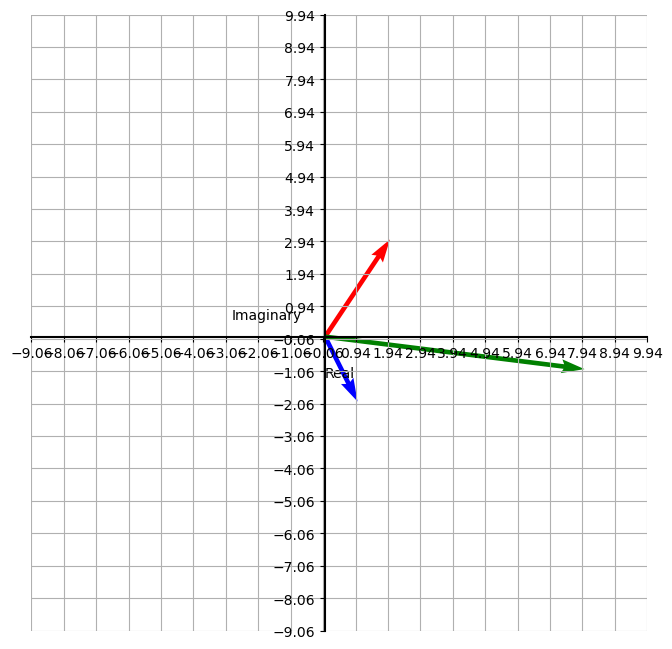

In [20]:
z1 = 2 + 3j
z2 = 1 - 2j
plot_complex_numbers([z1, z2, z1 * z2], ["red", "blue", "green"])

### Problem 3. Recursion and Fractals
<img src="recursion.jpg" style="max-height: 230px" />

> "To understand recursion, you first need to understand recursion."

There are three main parts to a recursive function:
1. Bottom - when the recursion should finish
2. Operation - some meaningful thing to do
3. Recursive call - calling the same function
4. Clean-up - returning all data to its previous state (this reverses the effect of the operation)

Let's do one of the most famous recursion examples. The most trivial function to recreate is the **factorial**. Derive (or look up) a recurrent definition of the factorial of a non-negative integer and implement it.

**There is a one-to-one correspondence between loops and recursion.** Use this correspondence to create an iterative definition (one which uses loops) and compare both. Test that they return the same results.

**Note:** Think how Python handles very large integers.

In [21]:
def factorial_recursive(n):
    """
    Computes the factorial of a non-negative number n (using recursion)
    """
    if (n == 1 or n == 0):
        return 1
    else:
        return(n * factorial_recursive(n - 1))

def factorial_iterative(n):
    """
    Computes the factorial of a non-negative number n (using iteration)
    """
    fact_result = 1
    for i in range(1, n + 1):
        fact_result *= i
    
    return fact_result


# Example usage
num = 5

print(f"The recursive result of {num}! is {factorial_recursive(num)}")
print(f"The iterative result of {num}! is {factorial_iterative(num)}")

The recursive result of 5! is 120
The iterative result of 5! is 120


#### Endless sequences
A very famous recursive definition gives us natural numbers (by (the Peano axioms)[https://en.wikipedia.org/wiki/Peano_axioms]). How can we recreate this using Python? Obviously, we cannot put an infinite sequence in a list. However, we can do something else: define the entire sequence and take only parts of it.

Devise a way to define all natural numbers, using the function signature below. Use this to define a smaller, but just as infinite, sequence of even numbers. **Hint:** If you're very stuck, think about the problem hard and it will finally _yield_ to your efforts.

In [22]:
def nat():
    """Returns all natural numbers"""
    i = 0

    while True:
        yield i
        i += 1

def even():
    """Returns all even numbers"""
    i = 0

    while True:
        if i % 2 == 0:
            yield i
        i += 1

In [23]:
gen = nat()
gen_even = even()
nums_range = 10

for _ in range(nums_range + 1):
    print(next(gen))

for num in gen_even:
    if num > nums_range:
        break
    
    print(num)

0
1
2
3
4
5
6
7
8
9
10
0
2
4
6
8
10


Use the approach above to rewrite the factorial function in a "lazy" way.

In [24]:
def factorial_new(n):
    """Returns the factorial result of a given number using a generator expression and the yield method"""
    result = 1

    while n > 0:
        result *= n
        yield result
        n -= 1

num = 5
res = factorial_new(num)
final_result = None

for intermediate_result in res:
    final_result = intermediate_result

print(f"The lazy result of {num}! is {final_result}")

The lazy result of 5! is 120


Use **the same approach** to return the Fibonacci sequence - another famous one in mathematics.

In [25]:
def fibonacci(n):
    """Returns the Fibonacci sequence in a given range using a generator expression"""
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

custom_range = 20
print(list(fibonacci(20)))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


#### The Mandelbrot set
Now, let's get to something more beefy. The Mandelbrot set is defined by repeatedly squaring complex numbers. It turns out that it produces a **fractal** - a self-similar structure. Follow a tutorial to create (and possibly visualize) the Mandelbrot set. I think [this one](https://medium.com/swlh/visualizing-the-mandelbrot-set-using-python-50-lines-f6aa5a05cf0f) is a good starting point.

In [26]:
# setting up the image frame
width = 1000
x = -0.65
y = 0
xRange = 3.4
aspectRatio = 4/3 

precision = 500

height = round(width / aspectRatio)
yRange = xRange / aspectRatio
minX = x - xRange / 2
maxX = x + xRange / 2
minY = y - yRange / 2
maxY = y + yRange / 2

img = Image.new('RGB', (width, height), color = 'black')
pixels = img.load()

# coloring methods

def logColor(distance, base, const, scale):
    color = -1 * math.log(distance, base)
    rgb = colorsys.hsv_to_rgb(const + scale * color,0.8,0.9)
    return tuple(round(i * 255) for i in rgb)

def powerColor(distance, exp, const, scale):
    color = distance**exp
    rgb = colorsys.hsv_to_rgb(const + scale * color,1 - 0.6 * color,0.9)
    return tuple(round(i * 255) for i in rgb)

# mapping image pixels to cartesian points x and y
for row in range(height):
    for col in range(width):
        x = minX + col * xRange / width
        y = maxY - row * yRange / height
        oldX = x
        oldY = y
        for i in range(precision + 1):
            a = x*x - y*y #real component of z^2
            b = 2 * x * y #imaginary component of z^2
            x = a + oldX #real component of new z
            y = b + oldY #imaginary component of new z
            if x*x + y*y > 4:
                break
        if i < precision:
            distance = (i + 1) / (precision + 1)
            rgb = powerColor(distance, 0.2, 0.27, 1.0)
            pixels[col,row] = rgb
        index = row * width + col + 1
        # print("{} / {}, {}%".format(index, width * height, round(index / width / height * 100 * 10) / 10))

output_filename = 'output.png'
img.save(output_filename)

# Open the image using the appropriate command based on the OS
if os.name == 'posix':
    if 'darwin' in os.uname().sysname.lower():
        os.system(f'open {output_filename}')  # macOS
    else:
        os.system(f'xdg-open {output_filename}')  # Linux
elif os.name == 'nt':
    os.system(f'start {output_filename}')  # Windows


#### * Optional problem
Try to recreate a Lindermeyer system (also known as **L-system**, [source](https://en.wikipedia.org/wiki/L-system)). These are systems created via a series of replacement rules. 

In [2]:
# Define the L-system generator
def generate_lsystem(axiom, rules, iterations):
    current_string = axiom
    for _ in range(iterations):
        next_string = ""
        for char in current_string:
            next_string += rules.get(char, char)
        current_string = next_string
    return current_string

# Define the drawing function using turtle
def draw_lsystem(t, instructions, angle, length):
    stack = []
    for command in instructions:
        if command == "F":
            t.forward(length)
        elif command == "+":
            t.right(angle)
        elif command == "-":
            t.left(angle)
        elif command == "[":
            position = t.position()
            heading = t.heading()
            stack.append((position, heading))
        elif command == "]":
            position, heading = stack.pop()
            t.penup()
            t.goto(position)
            t.setheading(heading)
            t.pendown()

def main():
    try:
        # Initialize Turtle screen
        screen = turtle.Screen()

        # Set up the turtle
        t = turtle.Turtle()
        t.speed(0)  # Fastest drawing speed
        t.hideturtle()  # Hide the cursor

        # L-system parameters
        axiom = "F"
        rules = {
            "F": "F[+F]F[-F]F"
        }
        iterations = 4
        angle = 25
        length = 5

        # Generate the L-system string
        lsystem_string = generate_lsystem(axiom, rules, iterations)

        # Start from the bottom center of the screen
        screen.setup(width=800, height=800)
        t.penup()
        t.goto(0, -screen.window_height()//2 + 20)  # Adjust as necessary
        t.pendown()
        t.left(90)  # Start facing upwards

        # Draw the L-system
        draw_lsystem(t, lsystem_string, angle, length)

        # Manually handle window closing
        screen.mainloop()

    except Exception as e:
        print("An error occurred:", e)

if __name__ == "__main__":
    main()

An error occurred: invalid command name ".!canvas"


### Problem 4. Run-length Encoding
One application of algebra and basic math can be **compression**. This is a way to save data in less space than it originally takes. The most basic form of compression is called [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding).

Write a function that encodes a given text. Write another one that decodes.

We can see that RLE is not very useful in the general case. But it can be extremely useful if we have very few symbols. An example of this can be DNA and protein sequences. DNA code, for example, has only 4 characters.

Test your encoding and decoding functions on a DNA sequence (you can look up some on the Internet). Measure how much your data is compressed relative to the original.

In [ ]:
def encode(text):
    """
    Returns the run-length encoded version of the text
    (numbers after symbols, length = 1 is skipped)
    """
    result = []
    count = 1

    for i in range(1, len(text)):
        if text[i] == text[i - 1]:
            count += 1
        else:
            result.append(text[i - 1] + str(count) if count > 1 else text[i - 1])
            count = 1

    result.append(text[i - 1] + str(count) if count > 1 else text[i - 1])

    return "".join(result)


def decode(text):
    """
    Decodes the text using run-length encoding
    """
    result = []
    count = 1

    for i in range(1, len(text)):
        if text[i].isdigit():
            count = int(text[i])
            result.append(text[i - 1] * count)
        else:
            if text[i + 1].isdigit():
                continue
            else:
                result.append(text[i])
                count = 1


    return "".join(result)

In [ ]:
print(encode("AABCCCDEEEE"))
print(decode("A2BC3DE4"))

A2BC3DE4
AABCCCDEEEE


In [ ]:
# Tests
# Test that the functions work on their own
assert encode("AABCCCDEEEE") == "A2BC3DE4"
assert decode("A2BC3DE4") == "AABCCCDEEEE"

# Test that the functions really invert each other
assert decode(encode("AABCCCDEEEE")) == "AABCCCDEEEE"
assert encode(decode("A2BC3DE4")) == "A2BC3DE4"

### * Problem 5. Function Invertibility and Cryptography
As we already saw, some functions are able to be inverted. That is, if we know the output, we can see what input generated it directly. This is true if the function is **one-to-one correspondence** (bijection).

However, not all functions are created the same. Some functions are easy to compute but their inverses are extremely difficult. A very important example is **number factorization**. It's relatively easy (computationally) to multiply numbers but factoring them is quite difficult. Let's run an experiment.

We'll need a function to generate random n-bit numbers. One such function can be found in the `random` package:
```python
import random
random.getrandbits(n_bits)
```

It works perfectly for this example. However, to make a point about random generators and their security, we may want to import a similar function from the `secrets` module instead. If you're interested, you can look up "cryptographic pseudo-random number generators" / "PRNGs".
```python
import secrets
secrets.randbits(n_bits)

```

We could, of course, write our factorization by hand but we'll use `sympy`
```python
from sympy.ntheory import factorint
factorint(1032969399047817906432668079951) # {3: 2, 79: 1, 36779: 1, 7776252885493: 1, 5079811103: 1}
```

This function returns a `dict` where the keys are the factors, and the values - how many times they should be multiplied.

We'll also need a tool to accurately measure performance. Have a look at [this one](https://docs.python.org/3/library/time.html#time.time) for example.

Specify a sequence of bit lengths, in increasing order. For example, you might choose something like `[10, 20, 25, 30, 32, 33, 35, 38, 40]`. Depending on your computer's abilities you can go as high as you want. For each bit length, generate a number. See how much time it takes to factor it. Then see how much time it takes to multiply the factors. Be careful how you measure these. You shouldn't include the number generation (or any other external functions) in your timing.

In order to have better accuracy, don't do this once per bit length. Do it, for example, five times, and average the results.

Plot all multiplication and factorization times as a function of the number of bits. You should see that factorization is much, much slower. If you don't see this, just try larger numbers :D.

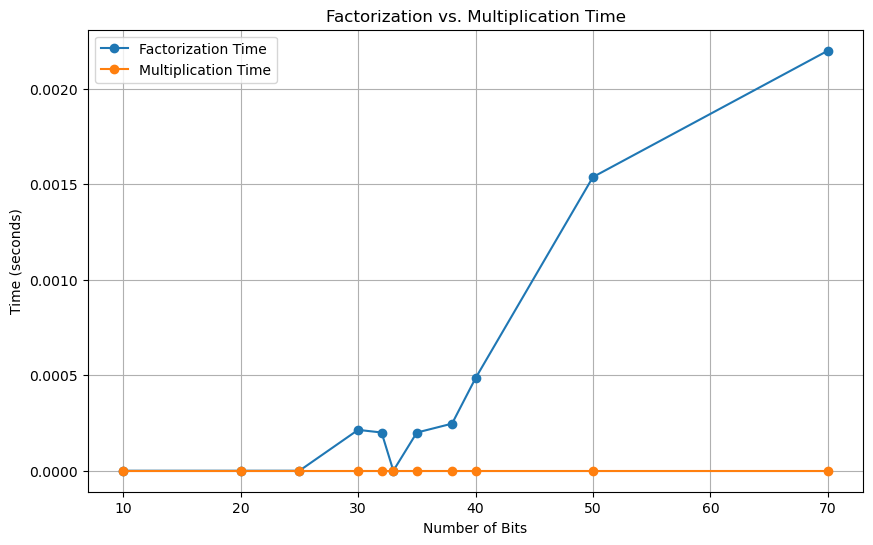

In [7]:
# Function to measure the time taken to factorize a number
def time_factorization(n):
    start_time = time.time()
    factors = factorint(n)
    end_time = time.time()
    return end_time - start_time, factors

# Function to measure the time taken to multiply the factors
def time_multiplication(factors):
    start_time = time.time()
    result = 1
    for factor, count in factors.items():
        result *= factor ** count
    end_time = time.time()
    return end_time - start_time

# Bit lengths to test
bit_lengths = [10, 20, 25, 30, 32, 33, 35, 38, 40, 50, 70]
num_trials = 5

# Lists to store the average times
avg_factorization_times = []
avg_multiplication_times = []

# Perform the experiment for each bit length
for bits in bit_lengths:
    factorization_times = []
    multiplication_times = []
    
    for _ in range(num_trials):
        # Generate a random n-bit number
        n = secrets.randbits(bits)
        
        # Measure factorization time
        fact_time, factors = time_factorization(n)
        factorization_times.append(fact_time)
        
        # Measure multiplication time
        mult_time = time_multiplication(factors)
        multiplication_times.append(mult_time)
    
    # Calculate average times
    avg_fact_time = np.mean(factorization_times)
    avg_mult_time = np.mean(multiplication_times)
    
    avg_factorization_times.append(avg_fact_time)
    avg_multiplication_times.append(avg_mult_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(bit_lengths, avg_factorization_times, label='Factorization Time', marker='o')
plt.plot(bit_lengths, avg_multiplication_times, label='Multiplication Time', marker='o')
plt.xlabel('Number of Bits')
plt.ylabel('Time (seconds)')
plt.title('Factorization vs. Multiplication Time')
plt.legend()
plt.grid(True)
plt.show()


### * Problem 6. Diffie - Hellman Key Exchange Simulation
As we already saw, there are functions which are very easy to compute in the "forward" direction but really difficult (computationally) to invert (that is, determine the input from the output). There is a special case: the function may have a hidden "trap door". If you know where that door is, you can invert the function easily. This statement is at the core of modern cryptography.

Look up **Diffie - Hellman key exchange** (here's a [video](https://www.youtube.com/watch?v=cM4mNVUBtHk) on that but feel free to use anything else you might find useful).

Simulate the algorithm you just saw. Generate large enough numbers so the difference is noticeable (say, factoring takes 10-15 seconds). Simulate both participants in the key exchange. Simulate an eavesdropper.

First, make sure after both participants run the algorithm, they have *the same key* (they generate the same number).

Second, see how long it takes for them to exchange keys.

Third, see how long it takes the eavesdropper to arrive at the correct shared secret.

You should be able to see **the power of cryptography**. In this case, it's not that the function is irreversible. It can be reversed, but it takes a really long time (and with more bits, we're talking billions of years). However, if you know something else (this is called a **trap door**), the function becomes relatively easy to invert.

In [17]:
# Function to find a primitive root for prime p
def find_primitive_root(p):
    if p == 2:
        return 1
    phi = p - 1
    factors = factorint(phi)
    for g in range(2, p):
        if all(pow(g, phi // q, p) != 1 for q in factors):
            return g
    return None

# Generate a large prime number
def generate_large_prime(bits):
    while True:
        p = secrets.randbits(bits)
        if p % 2 == 0:  # Ensure it's odd
            p += 1
        if isprime(p):
            return p

# Diffie-Hellman Key Exchange
def diffie_hellman_key_exchange(bits):
    # Step 1: Generate large prime p and primitive root g
    p = generate_large_prime(bits)
    g = find_primitive_root(p)
    
    # Step 2: Alice generates private key a and public key A
    a = secrets.randbelow(p)
    A = pow(g, a, p)
    
    # Step 3: Bob generates private key b and public key B
    b = secrets.randbelow(p)
    B = pow(g, b, p)
    
    # Step 4: Alice computes shared secret
    start_time = time.time()
    shared_secret_alice = pow(B, a, p)
    alice_time = time.time() - start_time
    
    # Step 5: Bob computes shared secret
    start_time = time.time()
    shared_secret_bob = pow(A, b, p)
    bob_time = time.time() - start_time
    
    # Verify that both shared secrets are the same
    assert shared_secret_alice == shared_secret_bob
    
    return p, g, A, B, shared_secret_alice, alice_time, bob_time

# Simulate eavesdropper attack (brute force discrete logarithm problem)
def eavesdrop_attack(p, g, A, B):
    start_time = time.time()
    for x in range(p):
        if pow(g, x, p) == A:
            a = x
            break
    for y in range(p):
        if pow(g, y, p) == B:
            b = y
            break
    shared_secret_eavesdropper = pow(g, a * b, p)
    attack_time = time.time() - start_time
    
    return shared_secret_eavesdropper, attack_time

# Parameters
bit_length = 24

# Simulate Diffie-Hellman Key Exchange
p, g, A, B, shared_secret, alice_time, bob_time = diffie_hellman_key_exchange(bit_length)
print(f"Prime (p): {p}")
print(f"Primitive Root (g): {g}")
print(f"Alice's Public Key (A): {A}")
print(f"Bob's Public Key (B): {B}")
print(f"Shared Secret: {shared_secret}")
print(f"Alice's Computation Time: {alice_time:.6f} seconds")
print(f"Bob's Computation Time: {bob_time:.6f} seconds")

# Simulate Eavesdropper Attack
shared_secret_eavesdropper, attack_time = eavesdrop_attack(p, g, A, B)
print(f"Eavesdropper's Computed Shared Secret: {shared_secret_eavesdropper}")
print(f"Eavesdropper's Attack Time: {attack_time:.6f} seconds")

# Verify that the eavesdropper's shared secret matches
assert shared_secret == shared_secret_eavesdropper


Prime (p): 14016341
Primitive Root (g): 2
Alice's Public Key (A): 8608404
Bob's Public Key (B): 3663314
Shared Secret: 12387189
Alice's Computation Time: 0.000000 seconds
Bob's Computation Time: 0.000000 seconds
Eavesdropper's Computed Shared Secret: 12387189
Eavesdropper's Attack Time: 10.733454 seconds


### ** Problem 7. The Galois Field in Cryptography
Research about the uses of the Galois field. What are its properties? How can it be used in cryptography? Write a simple cryptosystem based on the field. Research production-grade systems based on the Galois field.

You can use the following questions to facilitate your research:
* What is a field?
* What is GF(2)? Why is it an algebraic field?
* How and why do we extend the field to have more elements, like GF(3), GF(4), etc.? Do they have any practical applications?
* What is perfect secrecy? How does it relate to the participants in the conversation, and to the outside eavesdropper?
* What is symmetrical encryption?
* How to encrypt one-bit messages?
* How to extend the one-bit encryption system to many buts?
* Why is the system decryptable? How do the participants decrypt the encrypted messages?
* Why isn't the eavesdropper able to decrypt?
* What is a one-time pad?
    * How does the one-time pad achieve perfect secrecy?
* What happens if we try to use a one-time pad many times?
    * Provide an example where you break the "many-time pad" security
* What are some current enterprise-grade applications of encryption over GF(2)?
* Implement a cryptosystem based on GF(2). Show correctness on various test cases

### ** Problem 8. Huffman Compression Algorithm
Examine and implement the **Huffman algorithm** for compressing data. It's based on information theory and probability theory. Document your findings and provide your implementation.

This algorithm is used for **lossless compression**: compressing data without loss of quality. You can use the following checklist:

* What is the difference between lossless and lossy compression?
* When can we get away with lossy compression?
* What is entropy?
* How are Huffman trees constructed?
    * Provide a few examples
* How can we get back the uncompressed data from the Huffman tree?
* How and where are Huffman trees stored?
* Implement the algorithm. Add any other formulas / assumptions / etc. you might need.
* Test the algorithm. A good measure would be percentage compression: $$\frac{\text{compressed}}{\text{uncompressed}} * 100\%$$
* How well does Huffman's algorithm perform compared to other compression algorithms (e.g. LZ77)?